# Grupo 21: Thiago e Gabriele

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn import preprocessing

import plotly.graph_objects as go
import plotly.express as px

from mlxtend.frequent_patterns import apriori

In [2]:
!pip install mlxtend

In [3]:
df = pd.read_csv('trabalho4_dados_21.csv')
df

,ABSORVENTE,ACETONA,ACHOCOLATADO,ACUCAR,ADOCANTE,AGUA_OXIGENADA,AGUA,AGULHEIRO,ALGODAO,AMENDOIN,...,TAPETE,TINTURA,TOALHA_DE_BANHO,TORRADA,TRIGO_DE_QUIBE,UTEN_COZINHA,VELA_DE_FILTRO,VELA,VERDURAS,VINAGRE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9120,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Histograma da venda de cada produto

In [42]:
#dataframe com as vendas totais de cada produto, organizados de forma decrescente
s = df.sum()
s=s.sort_values( ascending=True)


<BarContainer object of 145 artists>

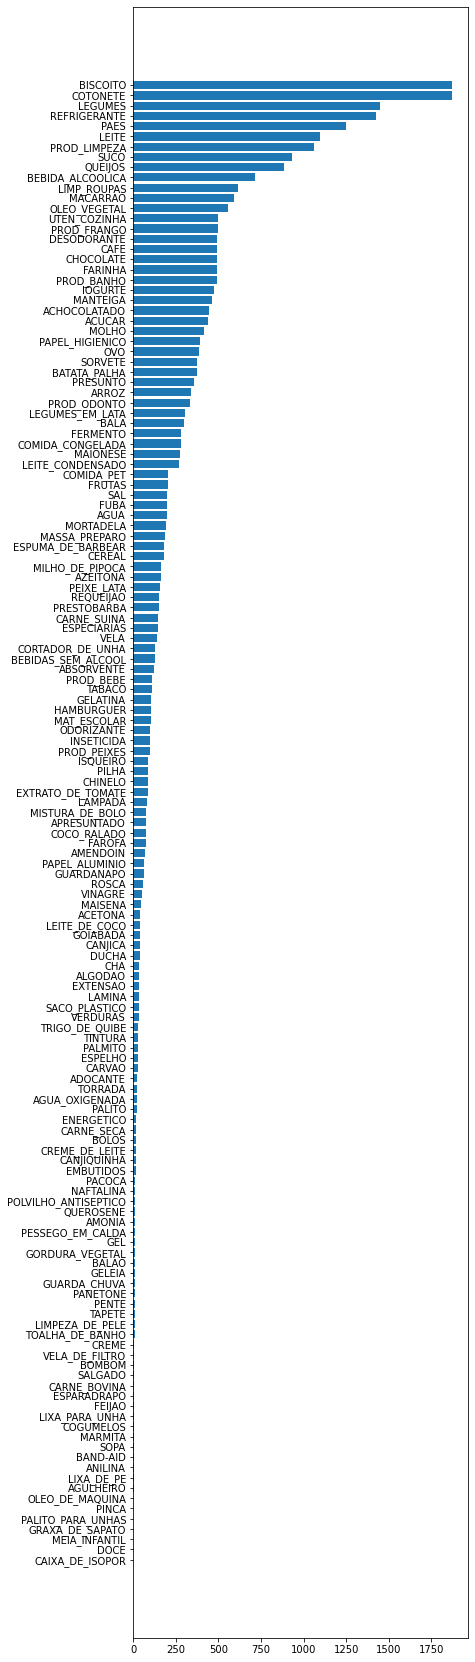

In [44]:
plt.figure(figsize=(6,30))
plt.barh(s.index,s)

### Transações

In [45]:
#armazenar as transações que foram realizadas, as compras armazenadas nas linhas do dataframe
transacoes=[]
for i in df.iterrows():#i é uma tupla(id da linha, um array com os produtos correspondentes a linha)
    transacoes.append(df.keys()[i[1]==1].values)#armazena o nome dos produtos que foram comprados em cada linha

In [46]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
dadosTransformados = pd.DataFrame(te.fit(transacoes).transform(transacoes), columns=te.columns_)
dadosTransformados


,ABSORVENTE,ACETONA,ACHOCOLATADO,ACUCAR,ADOCANTE,AGUA,AGUA_OXIGENADA,AGULHEIRO,ALGODAO,AMENDOIN,...,TAPETE,TINTURA,TOALHA_DE_BANHO,TORRADA,TRIGO_DE_QUIBE,UTEN_COZINHA,VELA,VELA_DE_FILTRO,VERDURAS,VINAGRE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9120,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
9121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Utilizando o método apriori 

In [53]:
itemsets = apriori(dadosTransformados, min_support=0.015,use_colnames=True)#com o min_support>0.3 não temos conjunto

itemsets.sort_values(by=['support'],ascending=False)

,support,itemsets
8,0.204932,(BISCOITO)
15,0.204932,(COTONETE)
75,0.204932,"(BISCOITO, COTONETE)"
24,0.158575,(LEGUMES)
48,0.155945,(REFRIGERANTE)
...,...,...
128,0.015123,"(PAES, DESODORANTE)"
54,0.015123,(VELA)
154,0.015123,"(PROD_BANHO, MACARRAO)"
156,0.015123,"(QUEIJOS, MACARRAO)"


### Regras de Associação

In [55]:
from mlxtend.frequent_patterns import association_rules

regras = association_rules(itemsets, metric="confidence", min_threshold=0.7)

regras.sort_values(by="lift",  ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(CARNE_SUINA),(ESPECIARIAS),0.016219,0.016219,0.016219,1.0,61.655405,0.015956,inf
5,(ESPECIARIAS),(CARNE_SUINA),0.016219,0.016219,0.016219,1.0,61.655405,0.015956,inf
98,"(FARINHA, COTONETE)","(CHOCOLATE, BISCOITO)",0.017315,0.017315,0.017315,1.0,57.753165,0.017015,inf
99,"(FARINHA, BISCOITO)","(COTONETE, CHOCOLATE)",0.017315,0.017315,0.017315,1.0,57.753165,0.017015,inf
100,"(COTONETE, CHOCOLATE)","(FARINHA, BISCOITO)",0.017315,0.017315,0.017315,1.0,57.753165,0.017015,inf
...,...,...,...,...,...,...,...,...,...
47,"(COTONETE, OLEO_VEGETAL)",(BISCOITO),0.018192,0.204932,0.018192,1.0,4.879679,0.014464,inf
46,"(MANTEIGA, BISCOITO)",(COTONETE),0.019178,0.204932,0.019178,1.0,4.879679,0.015248,inf
45,"(COTONETE, MANTEIGA)",(BISCOITO),0.019178,0.204932,0.019178,1.0,4.879679,0.015248,inf
44,"(BISCOITO, MACARRAO)",(COTONETE),0.021479,0.204932,0.021479,1.0,4.879679,0.017078,inf
